In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
df=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/MLR/Housing.csv')
df1=df
df1.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [80]:
def cat(x):
    if x=='yes':
        return(1)
    else:
        return(0)
df1['mainroad']=df1['mainroad'].apply(cat)
df1['guestroom']=df1['guestroom'].apply(cat)
df1['basement']=df1['basement'].apply(cat)
df1['hotwaterheating']=df1['hotwaterheating'].apply(cat)
df1['airconditioning']=df1['airconditioning'].apply(cat)
df1['prefarea']=df1['prefarea'].apply(cat)

In [81]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [82]:
dummies=pd.get_dummies(df1['furnishingstatus'])
dummies.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [83]:
df1=pd.concat([df1,dummies],axis='columns')
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [84]:
df_merged=df1.drop(['furnishingstatus','furnished'],axis='columns')
df_merged.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
mms=MinMaxScaler()

In [87]:
df_merged[['price','area','bedrooms','bathrooms','stories','parking']]=mms.fit_transform(df_merged[['price','area','bedrooms','bathrooms','stories','parking']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [88]:
df_merged.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x=df_merged.drop(['price'],axis='columns')
y=df_merged['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [91]:
x_train.shape

(436, 13)

In [92]:
x_test.shape

(109, 13)

# Let's build the model


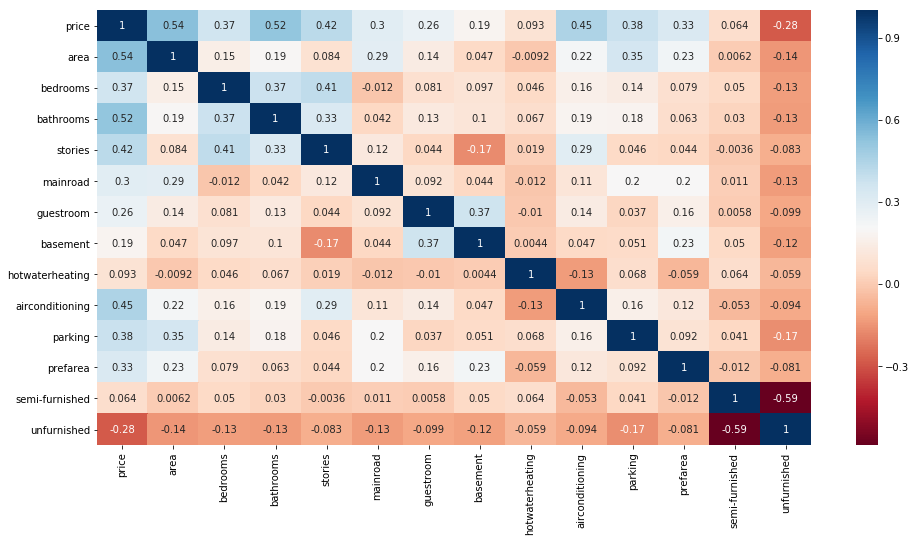

In [93]:
plt.figure(figsize=(16,8))
sns.heatmap(df_merged.corr(),annot=True,cmap='RdBu')

In [94]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
182,0.120962,0.4,0.0,0.333333,0,0,0,0,1,0.0,0,1,0
422,0.142268,0.2,0.0,0.000000,0,0,0,0,1,0.0,0,0,1
471,0.144330,0.4,0.0,0.333333,1,0,0,0,0,0.0,0,0,1
372,0.105155,0.4,0.0,0.333333,0,0,1,0,0,0.0,0,1,0
303,0.195876,0.4,0.0,0.000000,1,0,1,0,0,0.0,0,0,0


In [95]:
y_train.head()

182    0.293939
422    0.139394
471    0.109091
372    0.163636
303    0.212121
Name: price, dtype: float64

In [96]:
x_train1=x_train['area']
x_train1_sm=sm.add_constant(x_train1)
x_train1_sm.head()

,const,area
182,1.0,0.120962
422,1.0,0.142268
471,1.0,0.144330
372,1.0,0.105155
303,1.0,0.195876


In [97]:
model1=sm.OLS(y_train,x_train1_sm)
model1_lr=model1.fit()
model1_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           2.73e-30
Time:                        07:59:28   Log-Likelihood:                 240.23
No. Observations:                 436   AIC:                            -476.5
Df Residuals:                     434   BIC:                            -468.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1256      0.013      9.768      0.000       0.100       0.151
area           0.5634      0.046     12.363      0.000       0.474       0.653
==============================================================================
Omnibus:                       73.894   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.674
Skew:                           0.961   Prob(JB):                     2.10e-30
Kurtosis:                       4.956   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2 variables area and bathroom

In [98]:
x_train2=x_train[['area','bathrooms']]
x_train2_sm=sm.add_constant(x_train2)
x_train2_sm.head()

,const,area,bathrooms
182,1.0,0.120962,0.0
422,1.0,0.142268,0.0
471,1.0,0.144330,0.0
372,1.0,0.105155,0.0
303,1.0,0.195876,0.0


In [99]:
model2=sm.OLS(y_train,x_train2_sm)
model2_lr=model2.fit()
model2_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     181.0
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           7.45e-58
Time:                        07:59:29   Log-Likelihood:                 306.90
No. Observations:                 436   AIC:                            -607.8
Df Residuals:                     433   BIC:                            -595.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1031      0.011      9.203      0.000       0.081       0.125
area           0.4823      0.040     12.152      0.000       0.404       0.560
bathrooms      0.4442      0.036     12.447      0.000       0.374       0.514
==============================================================================
Omnibus:                       73.695   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.613
Skew:                           0.909   Prob(JB):                     4.40e-34
Kurtosis:                       5.270   Cond. No.                         7.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3 variables area, bathrooms, airconditioning

In [100]:
x_train3=x_train[['area','bathrooms','airconditioning']]
x_train3_sm=sm.add_constant(x_train3)
x_train3_sm.head()

,const,area,bathrooms,airconditioning
182,1.0,0.120962,0.0,1
422,1.0,0.142268,0.0,1
471,1.0,0.144330,0.0,0
372,1.0,0.105155,0.0,0
303,1.0,0.195876,0.0,0


In [101]:
model3=sm.OLS(y_train,x_train3_sm)
model3_lr=model3.fit()
model3_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     173.3
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           9.30e-74
Time:                        07:59:30   Log-Likelihood:                 346.70
No. Observations:                 436   AIC:                            -685.4
Df Residuals:                     432   BIC:                            -669.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0916      0.010      8.885      0.000       0.071       0.112
area                0.4020      0.037     10.781      0.000       0.329       0.475
bathrooms           0.4035      0.033     12.261      0.000       0.339       0.468
airconditioning     0.1096      0.012      9.302      0.000       0.086       0.133
==============================================================================
Omnibus:                       79.939   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.334
Skew:                           0.983   Prob(JB):                     1.25e-36
Kurtosis:                       5.287   Cond. No.                         8.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 variables area, bathrooms, airconditioning, stories

In [102]:
x_train4=x_train[['area','bathrooms','airconditioning','stories']]
x_train4_sm=sm.add_constant(x_train4)
x_train4_sm.head()

,const,area,bathrooms,airconditioning,stories
182,1.0,0.120962,0.0,1,0.333333
422,1.0,0.142268,0.0,1,0.000000
471,1.0,0.144330,0.0,0,0.333333
372,1.0,0.105155,0.0,0,0.333333
303,1.0,0.195876,0.0,0,0.000000


In [103]:
model4=sm.OLS(y_train,x_train4_sm)
model4_lr=model4.fit()
model4_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     148.2
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.29e-79
Time:                        07:59:31   Log-Likelihood:                 363.09
No. Observations:                 436   AIC:                            -716.2
Df Residuals:                     431   BIC:                            -695.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0714      0.011      6.780      0.000       0.051       0.092
area                0.4114      0.036     11.432      0.000       0.341       0.482
bathrooms           0.3408      0.034     10.166      0.000       0.275       0.407
airconditioning     0.0919      0.012      7.809      0.000       0.069       0.115
stories             0.1108      0.019      5.802      0.000       0.073       0.148
==============================================================================
Omnibus:                       92.417   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.215
Skew:                           1.078   Prob(JB):                     3.05e-47
Kurtosis:                       5.673   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5 variables area, bathrooms, airconditioning, stories, bedrooms

In [104]:
x_train5=x_train[['area','bathrooms','airconditioning','stories','bedrooms']]
x_train5_sm=sm.add_constant(x_train5)
x_train5_sm.head()

,const,area,bathrooms,airconditioning,stories,bedrooms
182,1.0,0.120962,0.0,1,0.333333,0.4
422,1.0,0.142268,0.0,1,0.000000,0.2
471,1.0,0.144330,0.0,0,0.333333,0.4
372,1.0,0.105155,0.0,0,0.333333,0.4
303,1.0,0.195876,0.0,0,0.000000,0.4


In [105]:
model5=sm.OLS(y_train,x_train5_sm)
model5_lr=model5.fit()
model5_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.32e-79
Time:                        07:59:32   Log-Likelihood:                 365.69
No. Observations:                 436   AIC:                            -719.4
Df Residuals:                     430   BIC:                            -694.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0439      0.016      2.737      0.006       0.012       0.075
area                0.4043      0.036     11.244      0.000       0.334       0.475
bathrooms           0.3199      0.035      9.241      0.000       0.252       0.388
airconditioning     0.0922      0.012      7.872      0.000       0.069       0.115
stories             0.0978      0.020      4.928      0.000       0.059       0.137
bedrooms            0.0877      0.039      2.268      0.024       0.012       0.164
==============================================================================
Omnibus:                       82.283   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.196
Skew:                           0.989   Prob(JB):                     1.22e-39
Kurtosis:                       5.440   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# selecting all variables

In [106]:
x_train_sm=sm.add_constant(x_train)

In [107]:
model_all=sm.OLS(y_train,x_train_sm)
model_all_lr=model_all.fit()
model_all_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     72.46
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           9.47e-99
Time:                        07:59:33   Log-Likelihood:                 430.20
No. Observations:                 436   AIC:                            -832.4
Df Residuals:                     422   BIC:                            -775.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0282      0.020      1.386      0.166      -0.012       0.068
area                0.2696      0.035      7.666      0.000       0.200       0.339
bedrooms            0.0464      0.034      1.347      0.179      -0.021       0.114
bathrooms           0.2640      0.031      8.616      0.000       0.204       0.324
stories             0.1073      0.018      5.870      0.000       0.071       0.143
mainroad            0.0378      0.014      2.796      0.005       0.011       0.064
guestroom           0.0404      0.013      3.129      0.002       0.015       0.066
basement            0.0238      0.011      2.266      0.024       0.003       0.044
hotwaterheating     0.0893      0.022      4.139      0.000       0.047       0.132
airconditioning     0.0836      0.010      7.966      0.000       0.063       0.104
parking             0.0768      0.017      4.399      0.000       0.042       0.111
prefarea            0.0613      0.011      5.491      0.000       0.039       0.083
semi-furnished     -0.0049      0.011     -0.432      0.666      -0.027       0.017
unfurnished        -0.0344      0.012     -2.795      0.005      -0.059      -0.010
==============================================================================
Omnibus:                       73.159   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.601
Skew:                           0.849   Prob(JB):                     4.48e-39
Kurtosis:                       5.615   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)

In [109]:
vif

,Features,VIF
0,area,4.93
1,bedrooms,7.40
2,bathrooms,1.72
3,stories,2.72
4,mainroad,5.89
5,guestroom,1.43
6,basement,1.98
7,hotwaterheating,1.11
8,airconditioning,1.80
9,parking,2.11


# remove semi-furnished

In [110]:
x_train_semi=x_train.drop('semi-furnished',axis='columns')
model=sm.OLS(y_train,x_train_semi)
model_semi=model.fit()
model_semi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     373.7
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          8.33e-217
Time:                        07:59:35   Log-Likelihood:                 429.19
No. Observations:                 436   AIC:                            -834.4
Df Residuals:                     424   BIC:                            -785.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.2794      0.034      8.120      0.000       0.212       0.347
bedrooms            0.0754      0.027      2.799      0.005       0.022       0.128
bathrooms           0.2587      0.030      8.537      0.000       0.199       0.318
stories             0.1061      0.018      5.814      0.000       0.070       0.142
mainroad            0.0481      0.011      4.291      0.000       0.026       0.070
guestroom           0.0400      0.013      3.100      0.002       0.015       0.065
basement            0.0256      0.010      2.460      0.014       0.005       0.046
hotwaterheating     0.0909      0.022      4.228      0.000       0.049       0.133
airconditioning     0.0844      0.010      8.083      0.000       0.064       0.105
parking             0.0759      0.017      4.367      0.000       0.042       0.110
prefarea            0.0602      0.011      5.422      0.000       0.038       0.082
unfurnished        -0.0267      0.009     -2.930      0.004      -0.045      -0.009
==============================================================================
Omnibus:                       66.239   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.875
Skew:                           0.788   Prob(JB):                     6.36e-34
Kurtosis:                       5.436   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
vif=pd.DataFrame()
vif['Features']=x_train_semi.columns
vif['VIF']=[variance_inflation_factor(x_train_semi.values,i) for i in range (x_train_semi.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,area,4.89
1,bedrooms,6.67
2,bathrooms,1.70
3,stories,2.71
4,mainroad,5.55
5,guestroom,1.42
6,basement,1.97
7,hotwaterheating,1.10
8,airconditioning,1.79
9,parking,2.10


# remove basement

In [115]:
x_train_base=x_train.drop(['semi-furnished','basement'],axis='columns')
model_base=sm.OLS(y_train,x_train_base)
model_base_lr=model_base.fit()
model_base_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     402.3
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          8.14e-217
Time:                        08:03:06   Log-Likelihood:                 426.10
No. Observations:                 436   AIC:                            -830.2
Df Residuals:                     425   BIC:                            -785.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.2733      0.035      7.916      0.000       0.205       0.341
bedrooms            0.0937      0.026      3.597      0.000       0.042       0.145
bathrooms           0.2655      0.030      8.750      0.000       0.206       0.325
stories             0.0933      0.018      5.302      0.000       0.059       0.128
mainroad            0.0515      0.011      4.610      0.000       0.030       0.073
guestroom           0.0501      0.012      4.078      0.000       0.026       0.074
hotwaterheating     0.0908      0.022      4.194      0.000       0.048       0.133
airconditioning     0.0854      0.010      8.142      0.000       0.065       0.106
parking             0.0761      0.017      4.349      0.000       0.042       0.110
prefarea            0.0649      0.011      5.890      0.000       0.043       0.086
unfurnished        -0.0280      0.009     -3.054      0.002      -0.046      -0.010
==============================================================================
Omnibus:                       64.512   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.922
Skew:                           0.785   Prob(JB):                     1.52e-31
Kurtosis:                       5.312   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif=pd.DataFrame()
vif['Features']=x_train_base.columns
vif['VIF']=[variance_inflation_factor(x_train_base.values,i) for i in range (x_train_base.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,area,4.87
1,bedrooms,6.16
2,bathrooms,1.68
3,stories,2.49
4,mainroad,5.46
5,guestroom,1.28
6,hotwaterheating,1.10
7,airconditioning,1.79
8,parking,2.10
9,prefarea,1.45
